In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import average_precision_score, confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from nltp import Preprocessor
from wordcloud import WordCloud
from sklearn.pipeline import Pipeline


In [5]:
email_df = pd.read_csv('email_data/fraud_email_.csv')
email_df.head(2)

,Text,Class
0,Supply Quality China's EXCLUSIVE dimensions at...,1
1,over. SidLet me know. Thx.,0


In [14]:
email_df.info()
email_df.isna().any()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11928 entries, 0 to 11928
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    11928 non-null  object
 1   Class   11928 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 279.6+ KB


Text     False
Class    False
dtype: bool

In [12]:
email_df.dropna(inplace=True)
email_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11928 entries, 0 to 11928
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    11928 non-null  object
 1   Class   11928 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 279.6+ KB


In [15]:
email_df.head(10)

,Text,Class
0,Supply Quality China's EXCLUSIVE dimensions at...,1
1,over. SidLet me know. Thx.,0
2,"Dear Friend,Greetings to you.I wish to accost ...",1
3,MR. CHEUNG PUIHANG SENG BANK LTD.DES VOEUX RD....,1
4,Not a surprising assessment from Embassy.,0
5,Monica -Huma Abedin <Huma@clintonemail.com>Tue...,0
6,Pis print.H <hrod17@clintonemail.com>Thursday ...,0
7,Dear Tom--H <hrod17@clintonemail.com>Friday De...,0
8,Greetings from barrister Robert Williams=2CDea...,1
9,FYI. Thanks again for signing the book ---- an...,0


Text(0.5,1,'count')

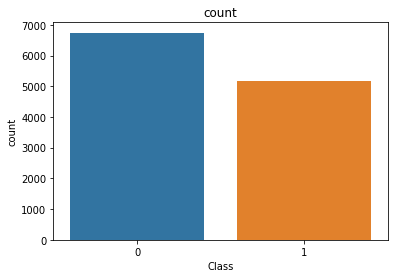

In [47]:
snb.countplot(email_df.Class)
plt.title("count")

In [50]:
pre = Preprocessor(email_df['Text']).text_cleaner()

Cleaning Complete
Time Taken: 10.824 seconds


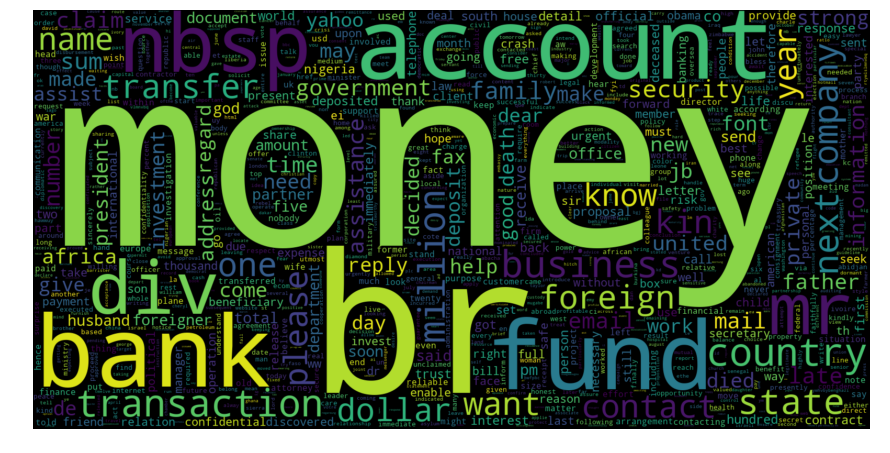

In [51]:
words = pre
plt.figure(figsize = (15,15))
word_cloud  = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(words))
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [25]:
stopset = set(stopwords.words("english"))

In [29]:
vectorizer = TfidfVectorizer(stop_words=stopset, binary=True)
X = vectorizer.fit_transform(email_df.Text)
y = email_df.Class

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, train_size=0.80)

In [134]:
class Metrics:
    def __init__(self, pred):
        self.pred = pred
        
    def cm(self):
        cm = confusion_matrix(y_test, self.pred)
        labels = ['Not Spam','Spam']

        f, ax = plt.subplots(figsize=(5,5))
        snb.heatmap(cm, annot=True, fmt=".0f", linecolor="r")

        ax.set_xticklabels(labels)
        ax.set_yticklabels(labels)
        plt.show()

    def report(self):
        class_report = classification_report(y_test, self.pred)
        print(class_report)


In [135]:
clf = RandomForestClassifier(n_estimators=10)

In [136]:
y_pred = clf.fit(X_train, y_train).predict_proba(X_test)

In [137]:
y_pred2 = clf.fit(X_train, y_train).predict(X_test)

In [138]:
y_pred[:, 1]

array([1.        , 1.        , 1.        , ..., 0.        , 0.9       ,
       0.40337079])

In [139]:
print(average_precision_score(y_test ,y_pred2))

0.978869763587317


In [140]:
print(average_precision_score(y_test ,y_pred[:,1]))

0.9972092921211329


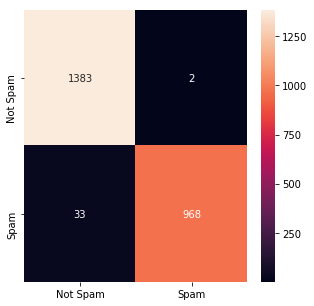

In [141]:
Metrics(y_pred2).cm()

0.9674380661473962


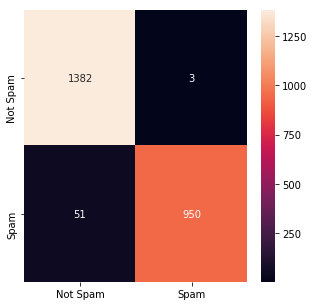

In [142]:
clf = LogisticRegression()
y_pred2 = clf.fit(X_train, y_train).predict(X_test)
print(average_precision_score(y_test ,y_pred2))
Metrics(y_pred2).cm()

0.8764523620398004


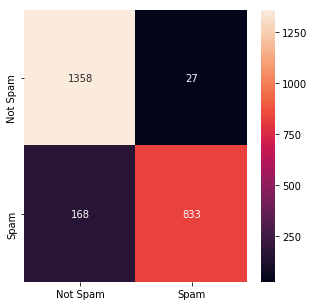

In [143]:
clf = BernoulliNB()
y_pred2 = clf.fit(X_train, y_train).predict(X_test)
print(average_precision_score(y_test ,y_pred2))
Metrics(y_pred2).cm()

0.9850846721061008


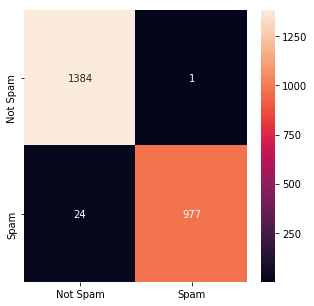

In [144]:
clf = LinearSVC()
y_pred2 = clf.fit(X_train, y_train).predict(X_test)
print(average_precision_score(y_test ,y_pred2))
Metrics(y_pred2).cm()